<a href="https://colab.research.google.com/github/DulithKavinda/Machine-Learning-Projects/blob/main/used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Libraries

In [ ]:
!pip install numpy pandas opendatasets scikit-learn xgboost --quiet
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import re




Download dataset

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/competitions/playground-series-s4e9/overview")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dulithkavinda
Your Kaggle Key: ··········


100%|██████████| 7.84M/7.84M [00:00<00:00, 74.9MB/s]


Extracting archive ./playground-series-s4e9/playground-series-s4e9.zip to ./playground-series-s4e9


In [ ]:
data_dir = './playground-series-s4e9'

View Dataset

In [ ]:
!head {data_dir}/train.csv

id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950
6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 C

In [ ]:
!head {data_dir}/test.csv

id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid,8-Speed A/T,Silver,Black,None reported,Yes
188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,
188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,
188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
188538,Chevrolet,Express 2500 Work Van,2013,99524,Gasoline,285.0HP 4.8L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
188539,Lexus,RX 350 Base,2008,194000,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Transmis

Load Train Set

In [ ]:
df = pd.read_csv(data_dir+"/train.csv")

In [ ]:
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


Load Test Set

In [ ]:
test_df = pd.read_csv(data_dir+"/test.csv")

In [ ]:
test_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


Explore Train Set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [ ]:
df.model_year.min(), df.model_year.max()

(1974, 2024)

Explore Test set

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [ ]:
test_df.describe()

,id,model_year,milage
count,125690.000000,125690.000000,125690.000000
mean,251377.500000,2015.797526,66042.581510
std,36283.722005,5.673797,50223.858435
min,188533.000000,1974.000000,100.000000
25%,219955.250000,2013.000000,24500.000000
50%,251377.500000,2017.000000,57500.000000
75%,282799.750000,2020.000000,95798.000000
max,314222.000000,2024.000000,405000.000000


In [ ]:
df.shape, test_df.shape

((188533, 13), (125690, 12))

Data Analysis

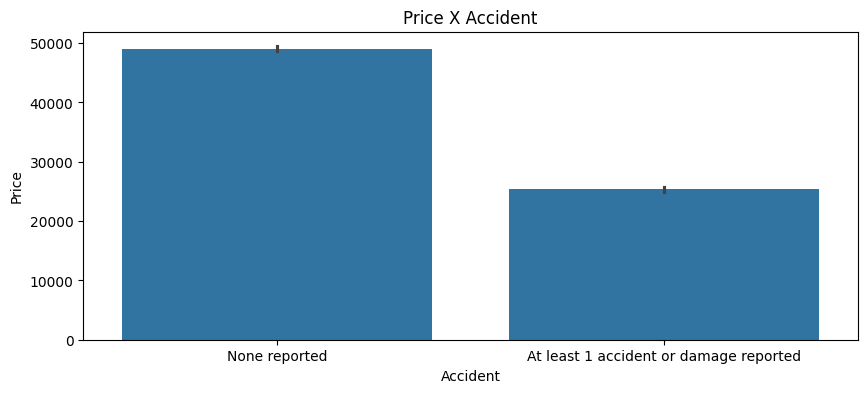

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='accident', y='price', data=df)
plt.title('Price X Accident')
plt.xlabel('Accident')
plt.ylabel('Price')
plt.show()

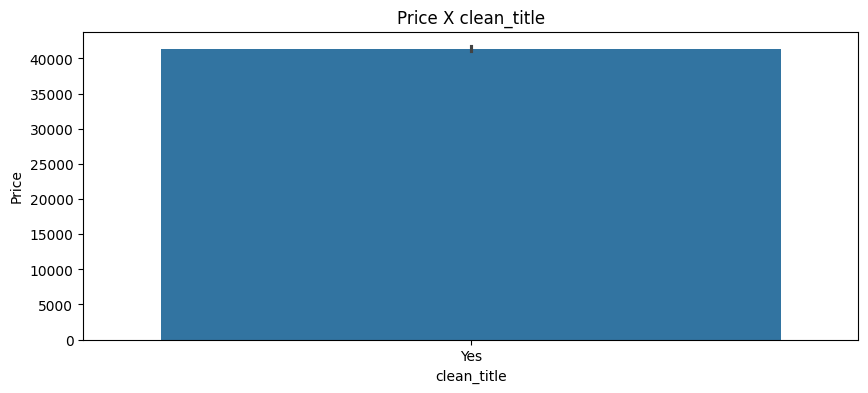

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='clean_title', y='price', data=df)
plt.title('Price X clean_title')
plt.xlabel('clean_title')
plt.ylabel('Price')
plt.show()

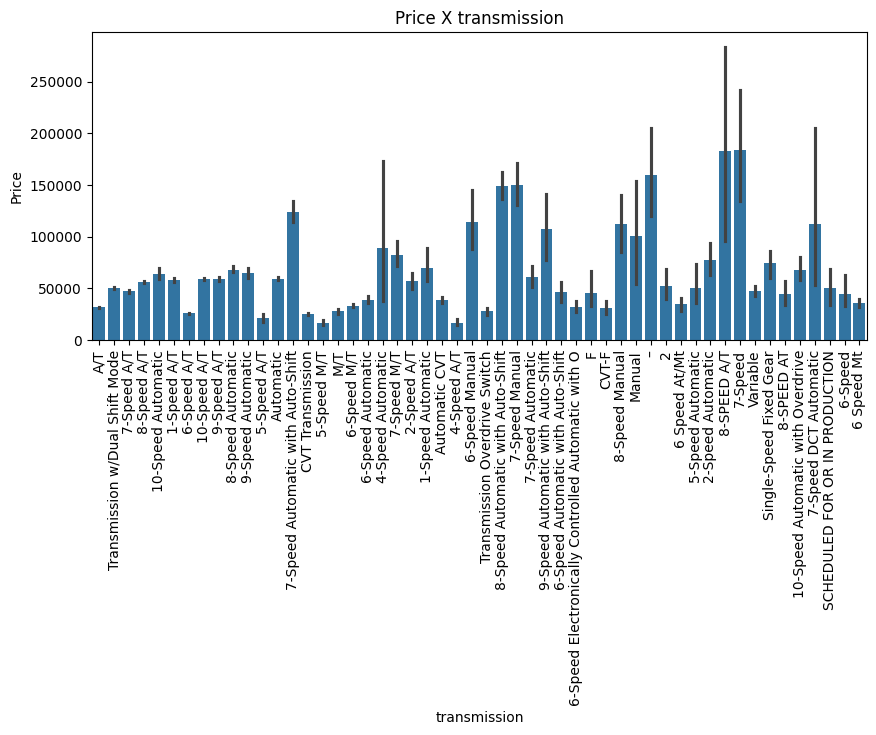

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='transmission', y='price', data=df)
plt.title('Price X transmission')
plt.xlabel('transmission')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

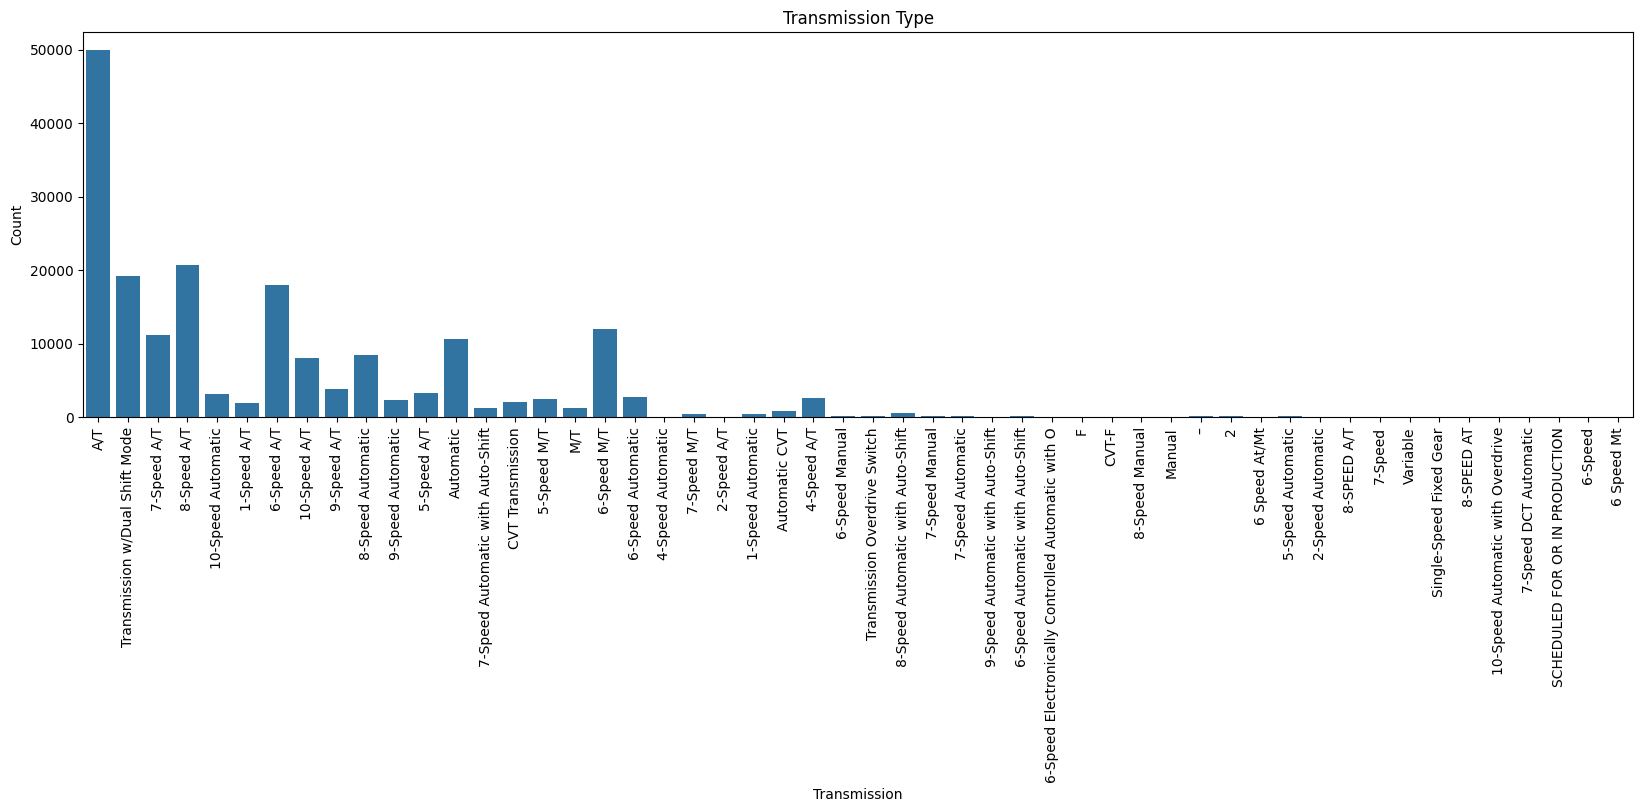

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x=df['transmission'])
plt.title("Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

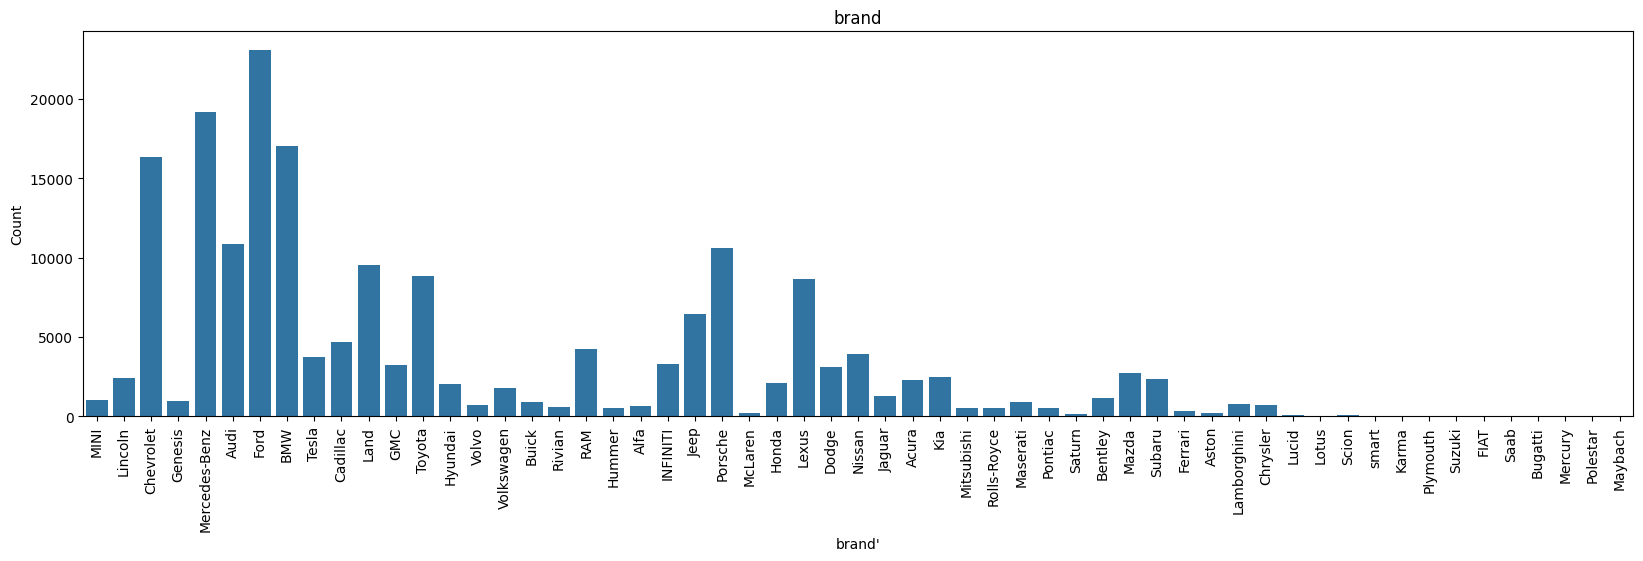

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x=df['brand'])
plt.title("brand")
plt.xlabel("brand'")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

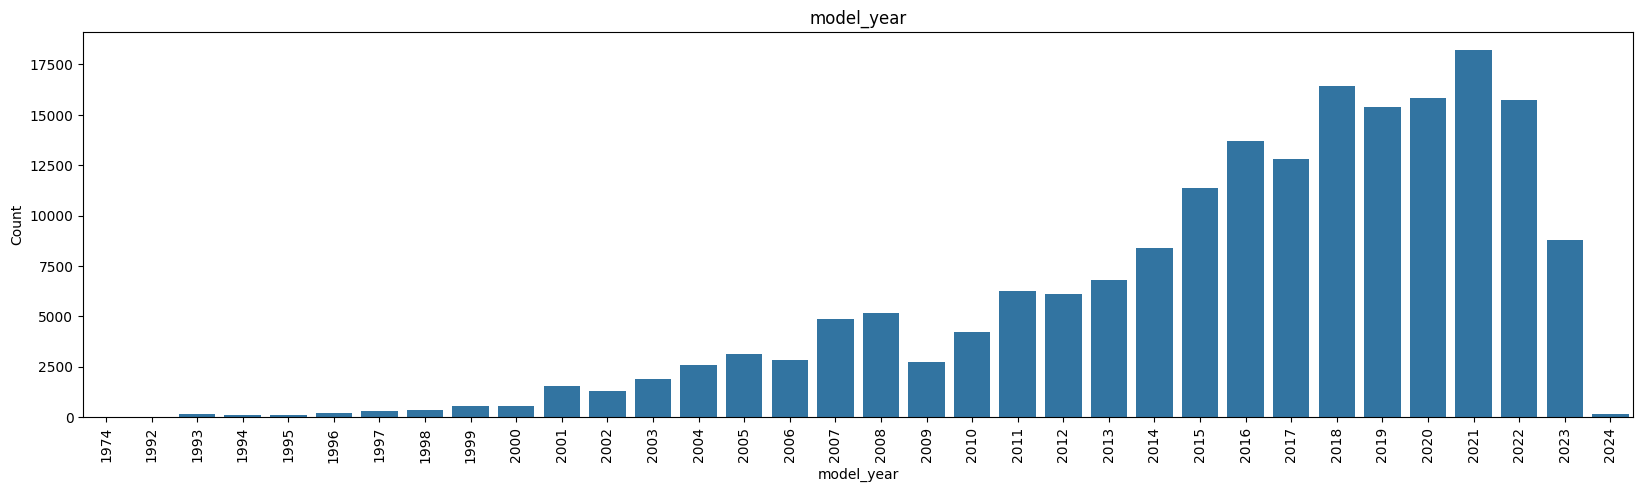

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x=df['model_year'])
plt.title("model_year")
plt.xlabel("model_year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

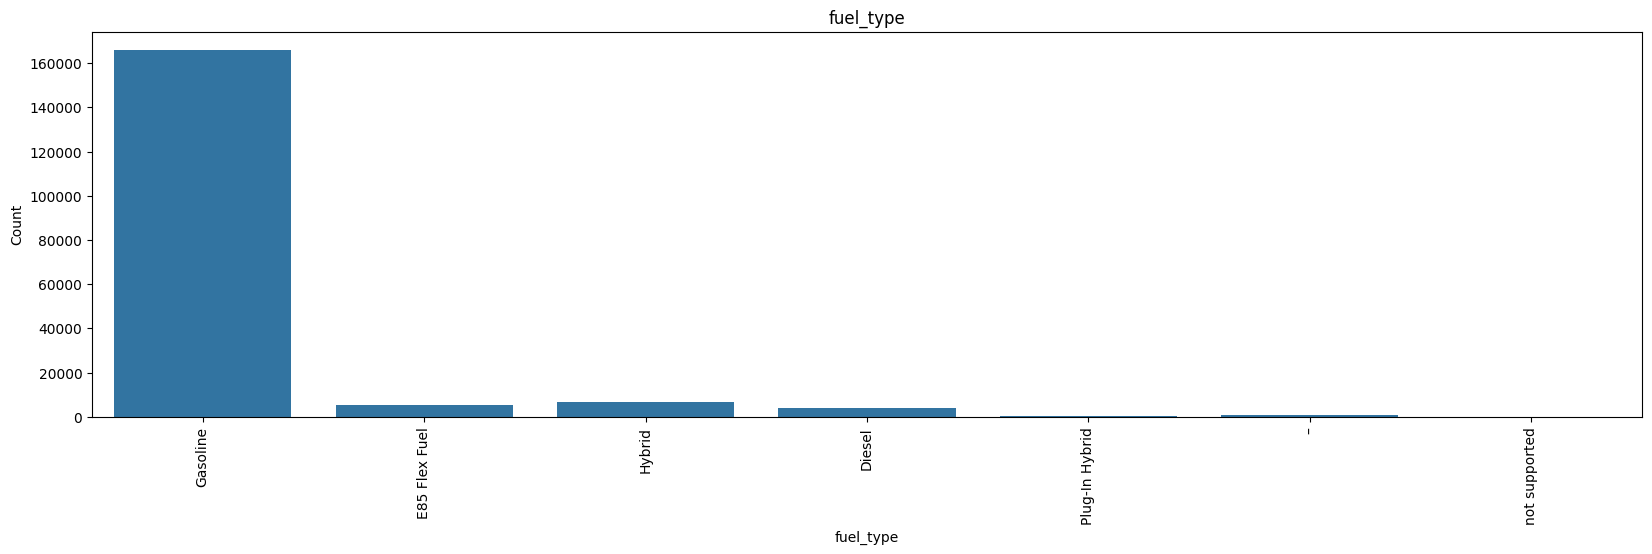

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x=df['fuel_type'])
plt.title("fuel_type")
plt.xlabel("fuel_type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

<ipython-input-25-7724edbfb871>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_brands.values, x=top_brands.index, palette="viridis")


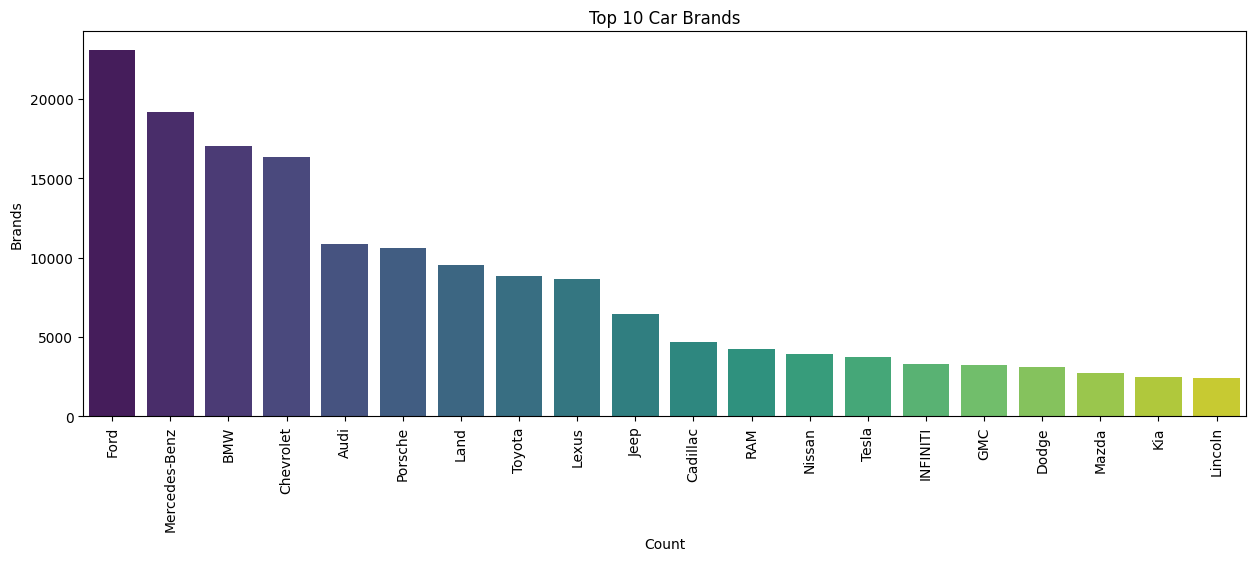

In [ ]:
plt.figure(figsize=(15, 5))
top_brands = df['brand'].value_counts().nlargest(20)
sns.barplot(y=top_brands.values, x=top_brands.index, palette="viridis")
plt.title("Top 10 Car Brands")
plt.xlabel("Count")
plt.ylabel("Brands")
plt.xticks(rotation=90)
plt.show()

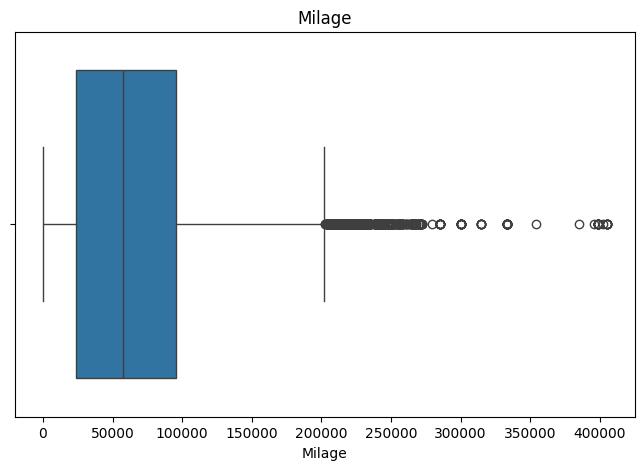

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['milage'])
plt.title("Milage")
plt.xlabel("Milage")
plt.show()

Organize Datasets

In [ ]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out_data = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    df = df.drop(out_data.index).reset_index(drop=True)
    return df

In [ ]:
df_without_outliers=remove_outliers(df,'milage')
df_without_outliers=remove_outliers(df_without_outliers , 'price')

df_without_outliers

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
1,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
2,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
3,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
4,5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175895,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
175896,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
175897,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
175898,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


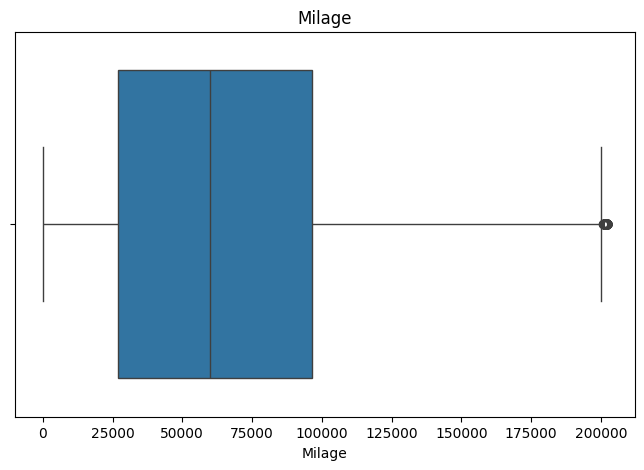

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_without_outliers['milage'])
plt.title("Milage")
plt.xlabel("Milage")
plt.show()

In [ ]:
df_without_outliers.drop('clean_title',axis=1,inplace=True)
test_df.drop('clean_title',axis=1,inplace=True)

In [ ]:
train_df = df_without_outliers.dropna()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169069 entries, 0 to 175899
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            169069 non-null  int64 
 1   brand         169069 non-null  object
 2   model         169069 non-null  object
 3   model_year    169069 non-null  int64 
 4   milage        169069 non-null  int64 
 5   fuel_type     169069 non-null  object
 6   engine        169069 non-null  object
 7   transmission  169069 non-null  object
 8   ext_col       169069 non-null  object
 9   int_col       169069 non-null  object
 10  accident      169069 non-null  object
 11  price         169069 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 16.8+ MB


Split Dataset

In [ ]:
train_df_after_split, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [ ]:
train_df_after_split

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
93377,100034,Mercedes-Benz,SL-Class SL500 Roadster,2006,80081,Gasoline,302.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,A/T,Gold,Beige,At least 1 accident or damage reported,16999
89808,96203,Mercedes-Benz,AMG C 43 Base 4MATIC,2017,65000,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Black,At least 1 accident or damage reported,65000
18482,19834,Mercedes-Benz,S-Class S 63 AMG,2016,10400,Gasoline,536.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,None reported,45000
113089,121176,Lamborghini,Aventador SVJ Base,2006,7958,Gasoline,5.2L V10 40V GDI DOHC,6-Speed Manual,Balloon White,Nero Ade,None reported,9000
84205,90217,Acura,TLX V6 Advance,2005,162000,Gasoline,290.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,4999
...,...,...,...,...,...,...,...,...,...,...,...,...
124712,133641,Lexus,RX 350 Base,2021,4665,Gasoline,3.5 Liter DOHC,Automatic,Silver,Black,None reported,43640
107873,115578,Porsche,911 Carrera,2021,36000,Gasoline,400.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Gray,None reported,43000
137289,147139,Lexus,GX 460 Base,2018,62500,Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,32999
152811,163788,BMW,M4 Base,2014,15509,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Black,Black,None reported,27900


In [ ]:
val_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
139190,149182,Lexus,RX 350 RX 350 F SPORT Handling,2023,10906,Gasoline,3.5 Liter DOHC,Automatic,Obsidian,Black,None reported,44798
128050,137195,Lexus,GX 470 Base,2006,134000,Gasoline,270.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,A/T,Gray,Gray,None reported,20000
72538,77728,Lexus,RX 350 Base,2007,149437,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,6299
5971,6417,Honda,Ridgeline Black Edition,2014,94500,Gasoline,280.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Gray,Beige,None reported,19000
77875,83446,Ford,F-150 XLT,2022,3950,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Black,Gray,None reported,53950
...,...,...,...,...,...,...,...,...,...,...,...,...
81102,86905,Chevrolet,Traverse High Country,2008,170000,Gasoline,280.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,A/T,Gold,Beige,None reported,6700
67197,72013,Maserati,Quattroporte S,2014,140401,Gasoline,395.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Blue,Black,None reported,16900
105962,113525,Chevrolet,Avalanche 1500 LS,2005,170000,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,None reported,7200
39609,42475,Porsche,Macan,2022,21613,Gasoline,2.0 Liter Turbo,Automatic,White,–,None reported,46598


Feature Extraction

In [ ]:
#encoding model col
encoder = LabelEncoder()

encoder.fit(train_df_after_split["model"])

train_df_after_split["model_encoded"] = encoder.transform(train_df_after_split["model"])

model_mapping = {model: idx for idx, model in enumerate(encoder.classes_)}


def encode_model(model_name):
    return model_mapping.get(model_name, -1)

val_df["model_encoded"] = val_df["model"].apply(encode_model)
test_df["model_encoded"] = test_df["model"].apply(encode_model)

In [ ]:
 #Extracts engine capacity in liters from engine data
def extract_engine_capacity(text):
    match = re.search(r'(\d+\.\d+)L', str(text))
    return float(match.group(1)) if match else None

 #Extracts horsepower in liters from engine data
def extract_horsepower(text):
    match = re.search(r'(\d+)HP', str(text))
    return int(match.group(1)) if match else None

In [ ]:
train_df_after_split['engine_capacity'] = train_df_after_split['engine'].apply(extract_engine_capacity)
train_df_after_split['horsepower'] = train_df_after_split['engine'].apply(extract_horsepower)

val_df['engine_capacity'] = val_df['engine'].apply(extract_engine_capacity)
val_df['horsepower'] = val_df['engine'].apply(extract_horsepower)

test_df['engine_capacity'] = val_df['engine'].apply(extract_engine_capacity)
test_df['horsepower'] = test_df['engine'].apply(extract_horsepower)

In [ ]:
#fill missing values
train_df_after_split['engine_capacity'].fillna(train_df_after_split['engine_capacity'].median(), inplace=True)
train_df_after_split['horsepower'].fillna(train_df_after_split['horsepower'].median(), inplace=True)

val_df['engine_capacity'].fillna(val_df['engine_capacity'].median(), inplace=True)
val_df['horsepower'].fillna(val_df['horsepower'].median(), inplace=True)

test_df['engine_capacity'].fillna(test_df['engine_capacity'].median(), inplace=True)
test_df['horsepower'].fillna(test_df['horsepower'].median(), inplace=True)

<ipython-input-47-569b12e67fab>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_after_split['engine_capacity'].fillna(train_df_after_split['engine_capacity'].median(), inplace=True)
<ipython-input-47-569b12e67fab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [ ]:
#more feature engineering
fuel_efficient = ["Plug-In Hybrid", "Hybrid"]
luxury_brands = [
    "Mercedes-Benz", "Audi", "BMW", "Tesla", "Cadillac", "Genesis",
    "Jaguar", "Lexus", "Porsche", "INFINITI", "Acura", "Maserati",
    "Rolls-Royce", "Bentley", "Lamborghini", "Ferrari", "Lucid",
    "Lotus", "Maybach", "Bugatti"
]
popular_colors = ["Black","White", "Silver"]
popular_int_colors = ["Black","Biege"]

train_df_copy = train_df_after_split[['id']].copy()
test_df_copy = test_df[['id']].copy()
val_df_copy = val_df[['id']].copy()

train_df_copy['is_luxury'] = train_df_after_split['brand'].isin(luxury_brands).astype(int)
test_df_copy['is_luxury'] = test_df['brand'].isin(luxury_brands).astype(int)
val_df_copy['is_luxury'] = val_df['brand'].isin(luxury_brands).astype(int)

train_df_copy['is_fuel_efficient'] = train_df_after_split['fuel_type'].isin(fuel_efficient).astype(int)
test_df_copy['is_fuel_efficient'] = test_df['fuel_type'].isin(fuel_efficient).astype(int)
val_df_copy['is_fuel_efficient'] = val_df['fuel_type'].isin(fuel_efficient).astype(int)

train_df_copy['is_popular_color'] = train_df_after_split['ext_col'].isin(popular_colors).astype(int)
test_df_copy['is_popular_color'] = test_df['ext_col'].isin(popular_colors).astype(int)
val_df_copy['is_popular_color'] = val_df['ext_col'].isin(popular_colors).astype(int)

train_df_copy['is_popular_int_color'] = train_df_after_split['ext_col'].isin(popular_int_colors).astype(int)
test_df_copy['is_popular_int_color'] = test_df['ext_col'].isin(popular_int_colors).astype(int)
val_df_copy['is_popular_int_color'] = val_df['ext_col'].isin(popular_int_colors).astype(int)

train_df_copy['is_automatic'] = (train_df_after_split['transmission'] == 'Automatic').astype(int)
test_df_copy['is_automatic'] = (test_df['transmission'] == 'Automatic').astype(int)
val_df_copy['is_automatic'] = (val_df['transmission'] == 'Automatic').astype(int)

train_df_copy['has_accident'] = (train_df_after_split['accident'] == 'At least 1 accident or damage reported').astype(int)
test_df_copy['has_accident'] = (test_df['accident'] == 'At least 1 accident or damage reported').astype(int)
val_df_copy['has_accident'] = (val_df['accident'] == 'At least 1 accident or damage reported').astype(int)

train_df_copy['is_high_mileage'] = (train_df_after_split['milage'] > 100000).astype(int)
test_df_copy['is_high_mileage'] = (test_df['milage'] > 100000).astype(int)
val_df_copy['is_high_mileage'] = (val_df['milage'] > 100000).astype(int)

train_df_copy['car_age'] = 2025 - train_df_after_split['model_year']
test_df_copy['car_age'] = 2025 - test_df['model_year']
val_df_copy['car_age'] = 2025 - val_df['model_year']

train_df_copy['milage_per_year'] = train_df_after_split['milage'] / (2025 - train_df_after_split['model_year'])
test_df_copy['milage_per_year'] = test_df['milage'] / (2025 - test_df['model_year'])
val_df_copy['milage_per_year'] = val_df['milage'] / (2025 - val_df['model_year'])








In [ ]:
df_train = train_df_after_split.merge(train_df_copy, on='id', how='inner')
df_test = test_df.merge(test_df_copy, on='id', how='inner')
df_val = val_df.merge(val_df_copy, on='id', how='inner')

In [ ]:
df_test['accident'] = df_test['accident'].fillna('Unknown')
df_test['fuel_type'] = df_test['fuel_type'].fillna('Unknown')

Extract Inputs and Outputs

In [ ]:
df_train.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'price',
       'model_encoded', 'engine_capacity', 'horsepower', 'is_luxury',
       'is_fuel_efficient', 'is_popular_color', 'is_popular_int_color',
       'is_automatic', 'has_accident', 'is_high_mileage', 'car_age',
       'milage_per_year'],
      dtype='object')

In [ ]:
input_cols = ['model_encoded','engine_capacity','horsepower','milage','is_luxury','is_fuel_efficient','is_popular_color','is_popular_int_color','is_automatic', 'has_accident', 'is_high_mileage', 'car_age' ,'milage_per_year']
target_col = 'price'

Training

In [ ]:
train_inputs = df_train[input_cols]
train_targets = df_train[target_col]

In [ ]:
train_targets

,price
0,16999
1,65000
2,45000
3,9000
4,4999
...,...
135250,43640
135251,43000
135252,32999
135253,27900


In [ ]:
val_inputs = df_val[input_cols]
val_target = df_val[target_col]

In [ ]:
val_target

,price
0,44798
1,20000
2,6299
3,19000
4,53950
...,...
33809,6700
33810,16900
33811,7200
33812,46598


In [ ]:
test_input = df_test[input_cols]

Train & Evaluate Baseline Model (linear regression model)

In [ ]:
linreg_model = LinearRegression()
linreg_model.fit(train_inputs, train_targets)

In [ ]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([16163.65554328, 33151.82122209, 47498.51311307, ...,
       37172.52773752, 44796.98440155, 34497.1602915 ])

In [ ]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([ 5.46072725e+04,  1.31047097e+04,  7.63774103e+03, ...,
       -7.68545905e-01,  4.99462227e+04,  1.13740701e+04])

In [ ]:
train_rmse = np.sqrt(mean_squared_error(train_targets, train_preds))
train_rmse

np.float64(14844.00066427373)

In [ ]:
val_rmse = np.sqrt(mean_squared_error(val_target, val_preds))
val_rmse

np.float64(14901.438641882858)

Make Predictions and Submit to Kaggle

In [ ]:
test_preds = linreg_model.predict(test_input)

In [ ]:
submission_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [ ]:
submission_df

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016
...,...,...
125685,314218,43878.016
125686,314219,43878.016
125687,314220,43878.016
125688,314221,43878.016


In [ ]:
#generate csv file
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['price'] = test_preds
    sub_df.to_csv(fname, index=None)

In [ ]:
generate_submission(test_preds, 'linreg_submission.csv')

Try different models

In [ ]:
#evaluate models
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = np.sqrt(mean_squared_error(train_targets, train_preds))
    val_preds = model.predict(val_inputs)
    val_rmse = np.sqrt(mean_squared_error(val_target, val_preds))
    return train_rmse, val_rmse, train_preds, val_preds

In [ ]:

def predict_and_submit(model, fname):
    test_preds = model.predict(test_input)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['price'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

Ridge Regression

In [ ]:
model1 = Ridge(random_state=42)

In [ ]:
model1.fit(train_inputs, train_targets)

In [ ]:
evaluate(model1)

(np.float64(14844.000666188733),
 np.float64(14901.436720645252),
 array([16163.96657746, 33152.01362415, 47498.31266603, ...,
        37172.62361014, 44796.75717931, 34497.32081306]),
 array([ 5.46074037e+04,  1.31043401e+04,  7.63759694e+03, ...,
        -7.66549632e-01,  4.99464796e+04,  1.13738150e+04]))

Random Forest

In [ ]:
model2 = RandomForestRegressor(max_depth=15, n_jobs=-1, random_state=42, n_estimators=100)

In [ ]:
model2.fit(train_inputs, train_targets)

In [ ]:
evaluate(model2)

(np.float64(10298.25561143174),
 np.float64(13250.998482110737),
 array([16045.6604323 , 39602.85086442, 58158.98873266, ...,
        38443.37434016, 26061.32512928, 44207.94232751]),
 array([56524.35587416, 11409.05249195,  9501.83851987, ...,
         8658.56397543, 50639.18638438, 10565.71540194]))

In [ ]:
predict_and_submit(model2, 'rf_submission.csv')

,id,price
0,188533,21110.494592
1,188534,49497.127557
2,188535,50652.085201
3,188536,28271.038388
4,188537,36748.843717
...,...,...
125685,314218,19549.053195
125686,314219,41646.642889
125687,314220,19533.866769
125688,314221,15037.578103


Gradient Boosting

In [ ]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [ ]:
model3.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
evaluate(model3)

(np.float64(12239.021529517791),
 np.float64(13091.025933821993),
 array([16876.734, 35717.953, 56353.258, ..., 32402.846, 31017.264,
        50126.094], dtype=float32),
 array([53645.84 , 11706.371,  8560.406, ...,  8188.167, 49951.586,
         9634.606], dtype=float32))

In [ ]:
predict_and_submit(model3, 'xgb_submission.csv')

,id,price
0,188533,22414.740234
1,188534,50123.050781
2,188535,54245.789062
3,188536,27538.718750
4,188537,35799.546875
...,...,...
125685,314218,20978.189453
125686,314219,39271.890625
125687,314220,18750.041016
125688,314221,13478.908203
